In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Data Preparation

In [2]:
file_path = Path("crypto_data.csv")
crypto_df = pd.read_csv(file_path, index_col=0)
crypto_df.head()

,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
365,365Coin,X11,True,PoW/PoS,NaN,2300000000
404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
611,SixEleven,SHA-256,True,PoW,NaN,611000
808,808,SHA-256,True,PoW/PoS,0.000000e+00,0


In [3]:
# List dataframe data types
crypto_df.dtypes

CoinName            object
Algorithm           object
IsTrading             bool
ProofType           object
TotalCoinsMined    float64
TotalCoinSupply     object
dtype: object

In [4]:
# Check how many 'True' and 'False' values there are in the dataframe
crypto_df['IsTrading'].value_counts()

True     1144
False     108
Name: IsTrading, dtype: int64

In [5]:
crypto_df = crypto_df[crypto_df['IsTrading']==True]
crypto_df.head()

,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
365,365Coin,X11,True,PoW/PoS,NaN,2300000000
404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
611,SixEleven,SHA-256,True,PoW,NaN,611000
808,808,SHA-256,True,PoW/PoS,0.000000e+00,0


In [6]:
crypto_df.shape

(1144, 6)

In [7]:
crypto_df.isnull().sum()

CoinName             0
Algorithm            0
IsTrading            0
ProofType            0
TotalCoinsMined    459
TotalCoinSupply      0
dtype: int64

In [8]:
#drop rows with null values
clean_crypto_df = crypto_df.dropna()

In [9]:
clean_crypto_df.shape

(685, 6)

In [10]:
clean_crypto_df.head()

,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
808,808,SHA-256,True,PoW/PoS,0.000000e+00,0
1337,EliteCoin,X13,True,PoW/PoS,2.927942e+10,314159265359
BTC,Bitcoin,SHA-256,True,PoW,1.792718e+07,21000000


In [11]:
# Keep for cryptocurrencies that have been mined.
# The total coins mines should be greater than zero.
clean_crypto_df = clean_crypto_df[clean_crypto_df['TotalCoinsMined']>0]

In [12]:
# The 'CoinName' column does not contribute to the analysis of the data
# so it will be dropped.
clean_crypto_df.drop(['CoinName'], axis=1, inplace=True)

In [13]:
clean_crypto_df.head()

,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
42,Scrypt,True,PoW/PoS,4.199995e+01,42
404,Scrypt,True,PoW/PoS,1.055185e+09,532000000
1337,X13,True,PoW/PoS,2.927942e+10,314159265359
BTC,SHA-256,True,PoW,1.792718e+07,21000000
ETH,Ethash,True,PoW,1.076842e+08,0


In [14]:
# Convert the remaining features with text values into numerical values.
# Use Pandas to create dummy variables.
X = pd.get_dummies(clean_crypto_df, columns=['Algorithm', 'ProofType'])
X

,IsTrading,TotalCoinsMined,TotalCoinSupply,Algorithm_1GB AES Pattern Search,Algorithm_536,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,...,ProofType_PoW/PoS,ProofType_PoW/PoS,ProofType_PoW/PoW,ProofType_PoW/nPoS,ProofType_Pos,ProofType_Proof of Authority,ProofType_Proof of Trust,ProofType_TPoS,ProofType_Zero-Knowledge Proof,ProofType_dPoW/PoW
42,True,4.199995e+01,42,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
404,True,1.055185e+09,532000000,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1337,True,2.927942e+10,314159265359,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
BTC,True,1.792718e+07,21000000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ETH,True,1.076842e+08,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZEPH,True,2.000000e+09,2000000000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
GAP,True,1.493105e+07,250000000,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
BDX,True,9.802226e+08,1400222610,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ZEN,True,7.296538e+06,21000000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
# Standarize data with StandarScaler
crypto_scaled = StandardScaler().fit_transform(X)
crypto_scaled

array([[ 0.        , -0.11710817, -0.1528703 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       [ 0.        , -0.09396955, -0.145009  , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       [ 0.        ,  0.52494561,  4.48942416, ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       ...,
       [ 0.        , -0.09561336, -0.13217937, ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       [ 0.        , -0.11694817, -0.15255998, ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       [ 0.        , -0.11710536, -0.15285552, ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ]])

# Dimensionality Reduction

In [17]:
# Applying PCA to reduce dimensions.  
from sklearn.decomposition import PCA


# Initialize PCA model and preserve 90% of the data.
pca = PCA(n_components=0.90)

# Get two principal components for the data.
pca_transformed_data  = pca.fit_transform(crypto_scaled)

In [18]:
pca_transformed_data.shape

(532, 74)

In [19]:
# Initialize t-SNE model 
from sklearn.manifold import TSNE
tsne = TSNE(perplexity=50)

In [20]:
# Reduce dimensions to two run t-SNE on the principal components - the
# output of the PCA transformation.
transformed_features  = tsne.fit_transform(pca_transformed_data)
transformed_features

array([[ -8.199415 ,  -5.669171 ],
       [ -9.884571 ,  -9.147612 ],
       [ -7.899081 , -15.417978 ],
       ...,
       [ 15.938444 ,   5.9556174],
       [  7.1971083,  12.076477 ],
       [  8.886678 ,  -5.567713 ]], dtype=float32)

In [21]:
transformed_features.shape

(532, 2)

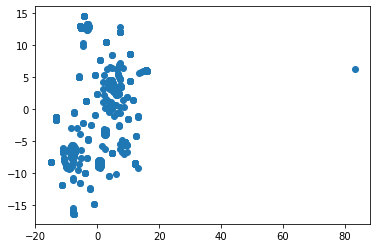

In [22]:
# Visualize the clusters
plt.scatter(transformed_features[:, 0], transformed_features[:,1])
plt.show()

In [23]:
# Cluster analysis with KMeans. Perform KMeans to find the best value for k
from sklearn.cluster import KMeans

inertia = []
k = [1,2,3,4,5,6,7,8,9,10]

# Calculate the inertia for the range of k values
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(transformed_features)
    inertia.append(km.inertia_)

# Create the Elbow Curve 
elbow_data = {"k": k, "inertia": inertia}

df_elbow = pd.DataFrame(elbow_data)
df_elbow.head(10)

C:\Users\MDavi23\Conda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


,k,inertia
0,1,70679.179688
1,2,38765.250000
2,3,26091.378906
3,4,19344.824219
4,5,15588.719727
5,6,10926.226562
6,7,8732.283203
7,8,7190.198242
8,9,5843.456055
9,10,4899.092773


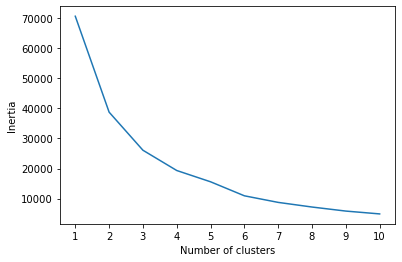

In [24]:
# Plot the elbow curve to find the best candidate(s) for k
plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()


In [25]:
# Initialize the k-means model. 
# Use K number = 5 as it looks like the elbow of the curve.
model = KMeans(n_clusters=5, random_state=0)
model.fit(transformed_features)

KMeans(n_clusters=5, random_state=0)

In [26]:
# Predict clusters
predictions = model.predict(transformed_features)
predictions

array([1, 1, 1, 2, 2, 0, 3, 0, 2, 2, 0, 0, 2, 2, 0, 1, 3, 0, 1, 1, 0, 0,
       2, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 3, 3, 1, 0, 2, 0, 0, 0, 0, 0, 0,
       0, 3, 0, 0, 0, 1, 3, 0, 3, 2, 0, 0, 0, 1, 0, 0, 0, 0, 2, 0, 1, 0,
       2, 0, 1, 3, 1, 1, 1, 0, 0, 0, 3, 3, 2, 0, 2, 3, 3, 2, 2, 2, 3, 1,
       1, 0, 0, 0, 0, 3, 0, 2, 1, 1, 0, 0, 3, 3, 0, 2, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 3, 0, 3, 0, 1, 0, 0, 0, 2, 0, 3, 1, 3, 2, 2, 1,
       3, 3, 0, 0, 0, 2, 1, 0, 2, 1, 3, 2, 3, 0, 0, 2, 3, 0, 2, 2, 1, 1,
       0, 3, 0, 0, 0, 3, 0, 2, 3, 0, 0, 3, 3, 2, 2, 1, 3, 0, 0, 1, 1, 1,
       1, 3, 3, 2, 3, 1, 0, 2, 2, 3, 1, 0, 1, 0, 0, 2, 0, 0, 1, 0, 1, 3,
       2, 0, 1, 1, 0, 1, 2, 2, 2, 3, 0, 3, 1, 3, 0, 1, 1, 3, 0, 3, 2, 1,
       3, 1, 1, 3, 0, 1, 0, 1, 1, 1, 3, 0, 0, 2, 1, 2, 3, 1, 3, 1, 0, 0,
       0, 0, 1, 3, 2, 1, 0, 2, 0, 0, 3, 1, 3, 0, 0, 3, 1, 0, 3, 1, 1, 1,
       2, 3, 0, 0, 2, 0, 1, 1, 2, 0, 0, 0, 1, 0, 0, 0, 0, 1, 3, 1, 1, 0,
       1, 0, 3, 3, 1, 0, 1, 0, 0, 3, 0, 3, 1, 2, 3,

In [29]:
clean_crypto_df['class'] = model.labels_
clean_crypto_df.head()

,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply,class
42,Scrypt,True,PoW/PoS,4.199995e+01,42,1
404,Scrypt,True,PoW/PoS,1.055185e+09,532000000,1
1337,X13,True,PoW/PoS,2.927942e+10,314159265359,1
BTC,SHA-256,True,PoW,1.792718e+07,21000000,2
ETH,Ethash,True,PoW,1.076842e+08,0,2


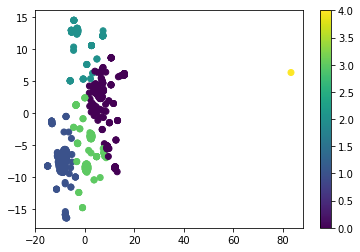

In [30]:
# Plot the reduced dimensions from tsne and colorcode them with the labels
plt.scatter(transformed_features[:, 0], transformed_features[:,1], c = model.labels_ )
plt.colorbar()
plt.show()

# The cryptocurrencies are clustered together as 1 for this dataset. The data is mostly a blob comprised of 4 clusters.